In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

In [ ]:
df=pd.read_csv('/content/Diabetes_cleaned.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,...,-2,-2,-2,-2,-2,0,0,0,0.0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",...,0,-2,-2,-2,-2,1,0,3,0.0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,...,0,-2,-2,-2,0,1,0,0,0.0,insulin_combo


In [ ]:
X = df.drop('readmitted', 1)
X_dum = pd.get_dummies(X, drop_first = True)
y = df['readmitted']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, test_size = 0.3, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


((67949, 95), (29121, 95), (67949,), (29121,))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)

DT.fit(X_train,y_train)
imp = pd.DataFrame(DT.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

,Importance
num_lab_procedures,0.119669
num_medications,0.101635
time_in_hospital,0.065218
age,0.051437
num_procedures,0.042286
...,...
"diag_2_Pregnancy, Childbirth",0.000558
diag_2_Not Required,0.000518
diag_2_Sense Organs,0.000493
diag_1_Sense Organs,0.000370


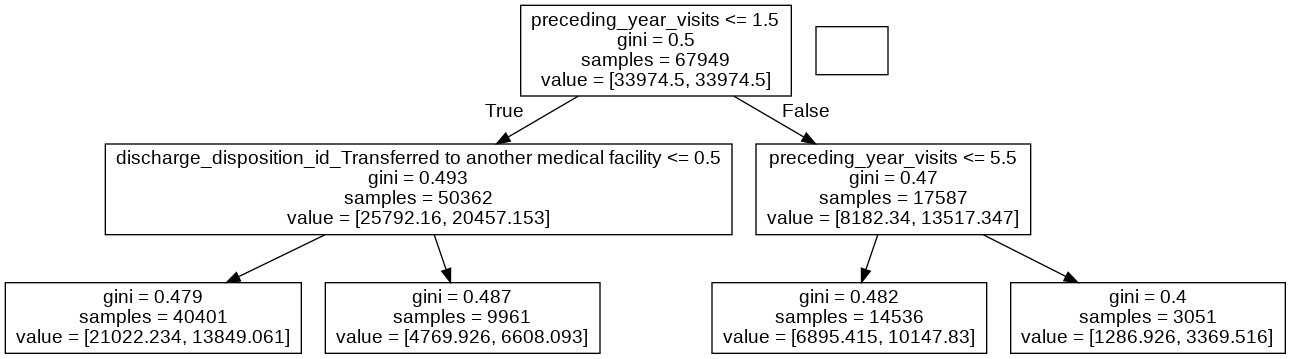

In [ ]:
tree = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced',max_depth=2)
tree.fit(X_train, y_train)

import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X_train.columns
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:

import sklearn.externals as extjoblib
import joblib

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
# Forward 
DT = DecisionTreeClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = DT,
          k_features=(1, 25), # Since in most of the models k was coming to be under 25 ( In Random forest 17 and 24 in lgbm)
          forward = True,       
          scoring = 'recall',
          cv = 5)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
25,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 32, 33, 41...","[0.17405266538214514, 0.19332048811817598, 0.1...",0.185895,"(time_in_hospital, num_lab_procedures, num_pro..."
19,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 33, 44, 46...","[0.178548490687219, 0.19910083493898523, 0.184...",0.185507,"(time_in_hospital, num_lab_procedures, num_pro..."
18,"(2, 3, 4, 5, 6, 16, 23, 28, 31, 33, 44, 46, 58...","[0.18047527296082208, 0.1817597944765575, 0.17...",0.184225,"(time_in_hospital, num_lab_procedures, num_pro..."
21,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 33, 41, 44...","[0.17533718689788053, 0.19653179190751446, 0.1...",0.183582,"(time_in_hospital, num_lab_procedures, num_pro..."
22,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 33, 41, 44...","[0.16955684007707128, 0.19910083493898523, 0.1...",0.183455,"(time_in_hospital, num_lab_procedures, num_pro..."
24,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 32, 33, 41...","[0.17405266538214514, 0.19588953114964675, 0.1...",0.183453,"(time_in_hospital, num_lab_procedures, num_pro..."
20,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 33, 41, 44...","[0.16955684007707128, 0.1901091843288375, 0.18...",0.182682,"(time_in_hospital, num_lab_procedures, num_pro..."
17,"(2, 3, 4, 5, 6, 16, 23, 28, 31, 33, 44, 46, 58...","[0.17662170841361594, 0.1913937058445729, 0.18...",0.182554,"(time_in_hospital, num_lab_procedures, num_pro..."
23,"(2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 32, 33, 41...","[0.1791907514450867, 0.18689788053949905, 0.17...",0.18217,"(time_in_hospital, num_lab_procedures, num_pro..."
11,"(2, 3, 4, 5, 6, 16, 23, 33, 81, 92, 94)","[0.19460500963391136, 0.17148362235067438, 0.1...",0.181911,"(time_in_hospital, num_lab_procedures, num_pro..."


In [ ]:
sfs_results.iloc[0]

feature_idx      (2, 3, 4, 5, 6, 16, 23, 28, 30, 31, 32, 33, 41...
cv_scores        [0.17405266538214514, 0.19332048811817598, 0.1...
avg_score                                                 0.185895
feature_names    (time_in_hospital, num_lab_procedures, num_pro...
Name: 25, dtype: object

In [ ]:
sfs_results.iloc[0]['feature_names']

('time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'preceding_year_visits',
 'discharge_disposition_id_Left AMA',
 'admission_source_id_Referral',
 'diag_1_Circulatory',
 'diag_1_Congenital Anomalies',
 'diag_1_Diabetes',
 'diag_1_Digestive',
 'diag_1_Neoplasms',
 'diag_1_Pregnancy, Childbirth',
 'diag_1_Respiratory',
 'diag_1_Sense Organs',
 'diag_2_Musculoskeletal System and Connective Tissue',
 'diag_2_Pregnancy, Childbirth',
 'diag_2_Sense Organs',
 'diag_3_Other Symptoms',
 'diag_3_Sense Organs',
 'max_glu_serum_None',
 'A1Cresult_>8',
 'insulin_treatment_insulin_only',
 'insulin_treatment_other_meds')

In [ ]:
# Backward
DT = DecisionTreeClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = DT,
          k_features=25, 
          forward = False, 
          scoring = 'recall',
          cv = 5)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

TypeError: ignored

In [ ]:
sfs_results.iloc[0]

In [ ]:
sfs_results.iloc[0]['feature_names']

### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1,class_weight='balanced_subsample')
RF.fit(X_train,y_train)
imp = pd.DataFrame(RF.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)


In [ ]:
# Backward
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = RF, 
          k_features=(1,97),
          forward = False,    
          scoring = 'recall',
          cv = 3,
          n_jobs=-1)               


sfs = sfs.fit(X_dum.values, y)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

In [ ]:
sfs_results.iloc[0,3]

In [ ]:
### Forward
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = RF, 
          k_features=(1,97),
          forward = True,    
          scoring = 'recall',
          cv = 3,
          n_jobs=-1)               


sfs = sfs.fit(X_dum, y)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

In [ ]:
sfs_results.iloc[0,3]

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)

GB.fit(X_train,y_train)
imp = pd.DataFrame(GB.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

In [ ]:
GB = GradientBoostingClassifier(random_state = 0)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = GB,
          k_features=(1, 25),
          forward = True,      
          scoring = 'recall',
          cv = 3)               
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T.sort_values(by = 'avg_score', ascending = False)
sfs_results

In [ ]:
sfs_results.iloc[0]['feature_names']

### LGBM

In [ ]:
# LGBM Forward
model1 = LGBMClassifier(random_state = 0, n_jobs = -1, class_weight = 'balanced')

# Create an SFS object
sfs1 = SFS(estimator = model1,
          k_features = (1, 97),
          forward = True,       # Set forward to True when we want to perform SFS
          scoring = 'f1',
          cv = 3)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs1 = sfs1.fit(X_dum, y)

In [ ]:
# Show the performance of each subset of features considered by SFS
sfs1_results = pd.DataFrame.from_dict(sfs1.subsets_).T.sort_values(by = 'avg_score', ascending = False) 
sfs1_results

In [ ]:
sfs1_results.iloc[0, 3]